This is our notebook for visualizations over the entire dataset--no feature transformations/cleaning done.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil import parser

In [48]:
crime = pd.read_csv("crime.csv")

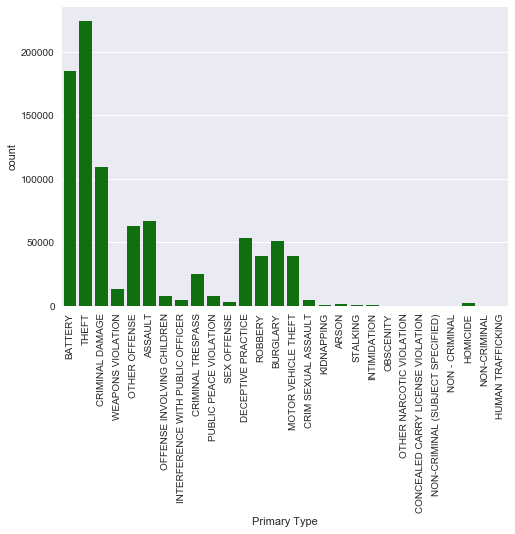

In [49]:
# Primary type counts
plt.xticks(rotation=90)
sns.countplot(x='Primary Type', data=crime, color='green')
plt.show()

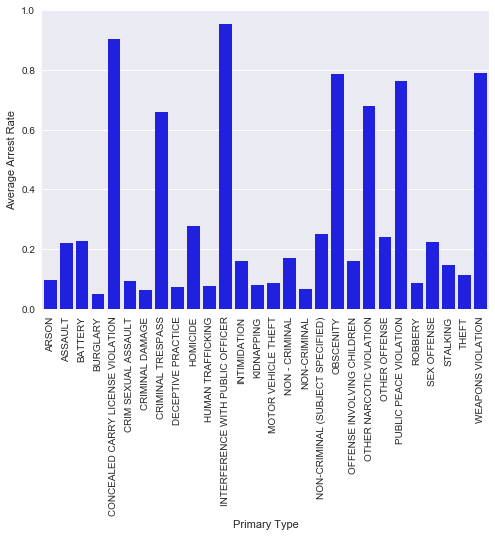

In [50]:
# Average arrest rate by primary type
arrest_rates = crime[['Primary Type', 'Arrest']].groupby('Primary Type', as_index=False).mean()
ax = sns.barplot(x='Primary Type', y='Arrest', data=arrest_rates, color='blue')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

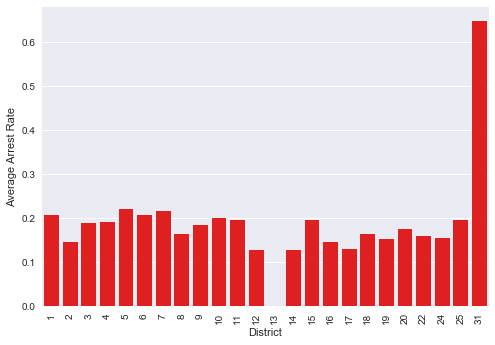

In [51]:
# Average arrest rate by primary type
arrest_rates = crime[['District', 'Arrest']].groupby('District', as_index=False).mean()
ax = sns.barplot(x='District', y='Arrest', data=arrest_rates, color='red')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

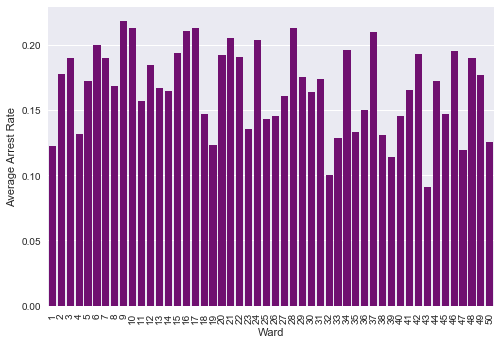

In [52]:
# Average arrest rate by primary type
arrest_rates = crime[['Ward', 'Arrest']].groupby('Ward', as_index=False).mean()
ax = sns.barplot(x='Ward', y='Arrest', data=arrest_rates, color='purple')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

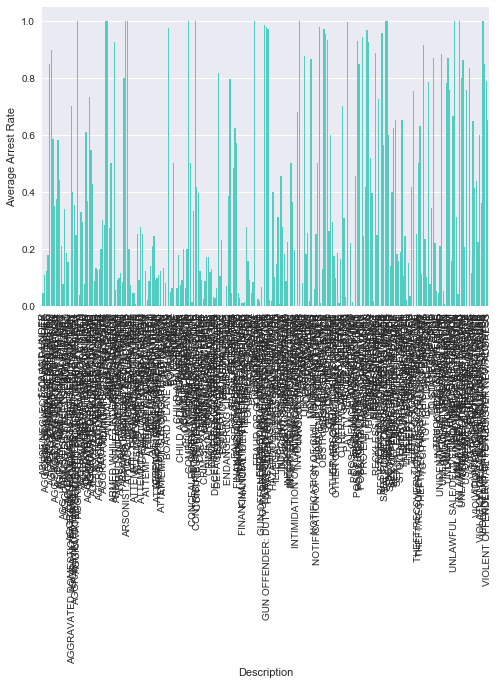

In [53]:
# Average arrest rate by primary type
arrest_rates = crime[['Description', 'Arrest']].groupby('Description', as_index=False).mean()
ax = sns.barplot(x='Description', y='Arrest', data=arrest_rates, color='turquoise')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

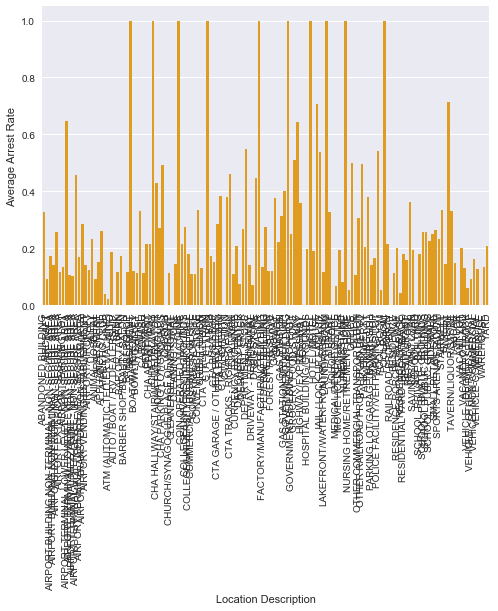

In [54]:
# Average arrest rate by primary type
arrest_rates = crime[['Location Description', 'Arrest']].groupby('Location Description', as_index=False).mean()
ax = sns.barplot(x='Location Description', y='Arrest', data=arrest_rates, color='orange')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

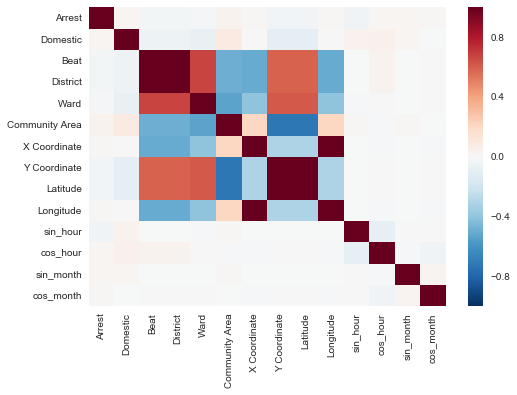

In [55]:
crime.drop(["Unnamed: 0"], inplace=True,axis=1 )
sns.heatmap(crime.corr())
plt.show()

In [56]:
df = pd.read_csv("data.csv")

In [57]:
# Drop all data not within last 5 years
df = df[df['Year'].map(int) > 2013]

In [58]:
def convert_to_datetime(row):
    dt = parser.parse(row["Date"])
    return dt

def label_month(row):
    dt = row["Datetime"]
    return dt.month

def label_hour(row):
    dt = row["Datetime"]
    return dt.hour
def label_day_of_week (row) :
    dt = row["Datetime"]
    return dt.weekday()
def label_day_of_month (row) :
    dt = row["Datetime"]
    return dt.day


In [59]:
# Convert Date to Month and Hour
df["Datetime"] = df.apply(lambda row : convert_to_datetime(row), axis = 1)
df["Month"] = df.apply(lambda row : label_month(row), axis = 1)
df["Hour"] = df.apply(lambda row : label_hour(row), axis = 1)


In [60]:
df["Day of Week"] = df.apply(lambda row : label_day_of_week(row), axis = 1)
df["Day of Month"] = df.apply(lambda row : label_day_of_month(row), axis = 1)

In [61]:
df[:10]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,Datetime,Month,Hour,Day of Week,Day of Month
1842704,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,...,2014,02/04/2016 06:33:39 AM,41.890828,-87.630235,"(41.890828047, -87.630234746)",2014-01-01 02:00:00,1,2,2,1
1842705,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,2014,02/04/2016 06:33:39 AM,41.893542,-87.629702,"(41.893541578, -87.629701805)",2014-01-01 00:00:00,1,0,2,1
1842712,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,2014,02/04/2016 06:33:39 AM,41.890046,-87.756333,"(41.890046233, -87.756333158)",2014-01-01 00:30:00,1,0,2,1
1842713,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,2014,02/04/2016 06:33:39 AM,41.935011,-87.759739,"(41.935011125, -87.759739272)",2014-01-01 00:30:00,1,0,2,1
1842717,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,...,2014,02/04/2016 06:33:39 AM,41.872509,-87.663069,"(41.872508972, -87.663069212)",2014-01-01 00:10:00,1,0,2,1
1842718,9446765,HX100013,01/01/2014 12:03:00 AM,064XX S ROCKWELL ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,...,2014,02/04/2016 06:33:39 AM,41.776780,-87.688465,"(41.776780469, -87.688465418)",2014-01-01 00:03:00,1,0,2,1
1842720,9446768,HX100076,01/01/2014 12:10:00 AM,016XX N MENARD AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,...,2014,02/04/2016 06:33:39 AM,41.910165,-87.770311,"(41.910165043, -87.770310914)",2014-01-01 00:10:00,1,0,2,1
1842721,9446769,HX100061,01/01/2014 01:00:00 AM,064XX S CENTRAL PARK AVE,2022,NARCOTICS,POSS: COCAINE,SIDEWALK,True,False,...,2014,02/04/2016 06:33:39 AM,41.775832,-87.713093,"(41.77583207, -87.71309304)",2014-01-01 01:00:00,1,1,2,1
1842722,9446770,HX100039,01/01/2014 12:30:00 AM,002XX S LOCKWOOD AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,2014,02/04/2016 06:33:39 AM,41.877865,-87.757599,"(41.87786538, -87.757599414)",2014-01-01 00:30:00,1,0,2,1
1842724,9446774,HX100101,01/01/2014 01:19:00 AM,026XX E 78TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,2014,02/04/2016 06:33:39 AM,41.753638,-87.559192,"(41.753638069, -87.559191655)",2014-01-01 01:19:00,1,1,2,1


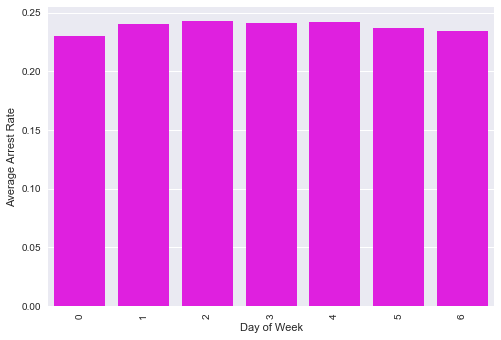

In [62]:
# Average arrest rate by day of week
arrest_rates = df[['Day of Week', 'Arrest']].groupby('Day of Week', as_index=False).mean()
ax = sns.barplot(x='Day of Week', y='Arrest', data=arrest_rates, color='magenta')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

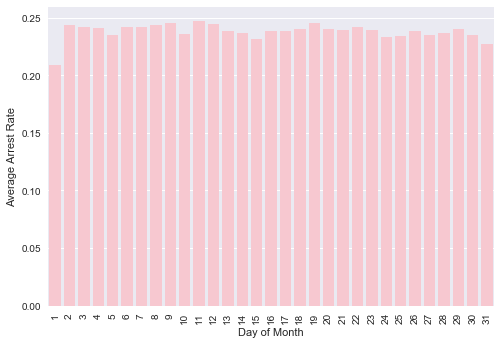

In [63]:
# Average arrest rate by day of month
arrest_rates = df[['Day of Month', 'Arrest']].groupby('Day of Month', as_index=False).mean()
ax = sns.barplot(x='Day of Month', y='Arrest', data=arrest_rates, color='pink')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

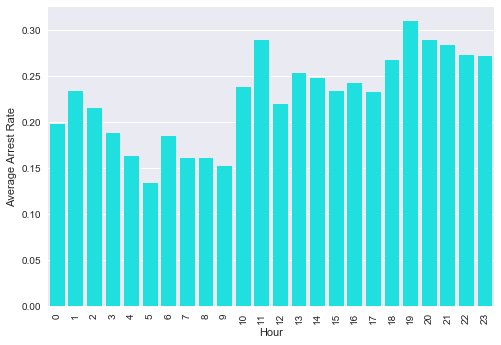

In [64]:
# Average arrest rate by day of month
arrest_rates = df[['Hour', 'Arrest']].groupby('Hour', as_index=False).mean()
ax = sns.barplot(x='Hour', y='Arrest', data=arrest_rates, color='cyan')
plt.xticks(rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()